In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# paths
from pathlib import Path
from utils.paths import DATA_RAW_DIR

In [3]:
path_tips = DATA_RAW_DIR / "tips.csv"
print(Path(path_tips).exists())

True


In [4]:
df_tips = pd.read_csv(path_tips, sep=",", encoding="utf-8")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# tips_by_day_mean
tips_by_day_mean = df_tips.groupby("day")["tip"].mean()
tips_by_day_mean

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [12]:
type(tips_by_day_mean)

pandas.core.series.Series

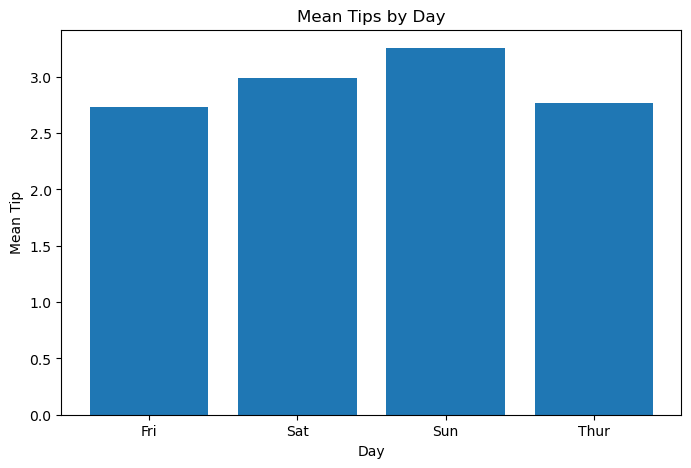

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(data=tips_by_day_mean, x=tips_by_day_mean.index, height=tips_by_day_mean.values)
ax.set_title("Mean Tips by Day")
ax.set_xlabel("Day")
ax.set_ylabel("Mean Tip")
plt.show()

Text(0, 0.5, 'Propina promedio')

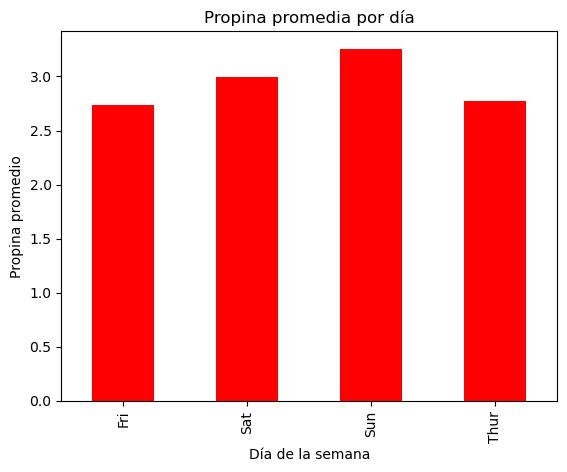

In [13]:
ax = tips_by_day_mean.plot.bar(color = 'red', title = 'Propina promedia por día')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Propina promedio")

In [14]:
# barras apiladas

# group

genre_tip_by_day = df_tips.groupby(["day", "sex"])["tip"].count()
genre_tip_by_day

day   sex   
Fri   Female     9
      Male      10
Sat   Female    28
      Male      59
Sun   Female    18
      Male      58
Thur  Female    32
      Male      30
Name: tip, dtype: int64

Text(0, 0.5, 'Cantidad de mesas')

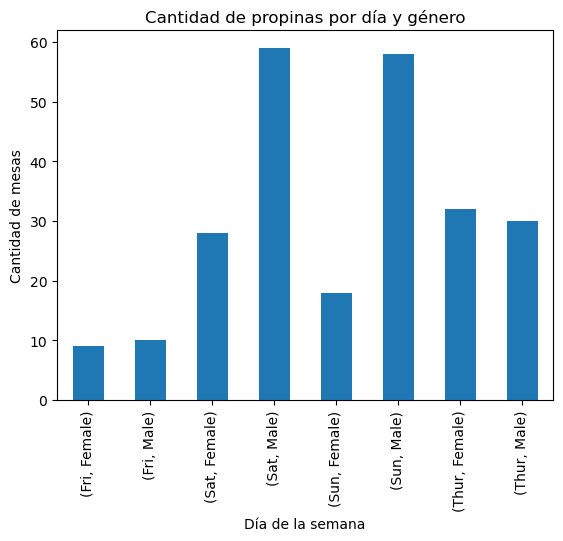

In [15]:
ax = genre_tip_by_day.plot.bar(stacked=True, title = 'Cantidad de propinas por día y género')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Cantidad de mesas")

In [16]:
wide_genre_by_day = genre_tip_by_day.unstack()
wide_genre_by_day

sex,Female,Male
day,,
Fri,9,10
Sat,28,59
Sun,18,58
Thur,32,30


Text(0, 0.5, 'Cantidad de clientes')

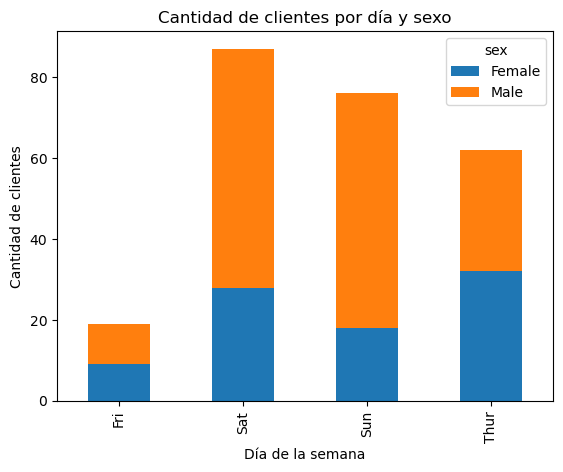

In [17]:
ax = wide_genre_by_day.plot.bar(stacked=True, title = 'Cantidad de clientes por día y sexo')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Cantidad de clientes")

In [19]:
df_fmri = sns.load_dataset("fmri")
len(df_fmri)

1064

In [20]:
df_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [21]:
subject13 = df_fmri.loc[ (df_fmri.subject == 's13') & (df_fmri.event == 'cue') & (df_fmri.region == 'frontal') ]
print(subject13)

     subject  timepoint event   region    signal
605      s13          5   cue  frontal  0.056731
625      s13          0   cue  frontal -0.012576
637      s13          4   cue  frontal  0.058704
651      s13          3   cue  frontal  0.034135
659      s13          6   cue  frontal  0.022420
680      s13         17   cue  frontal -0.004190
708      s13         18   cue  frontal -0.012163
730      s13         14   cue  frontal -0.005701
770      s13         15   cue  frontal -0.003053
784      s13         16   cue  frontal -0.002522
938      s13         11   cue  frontal -0.040369
952      s13         10   cue  frontal -0.066287
960      s13         13   cue  frontal -0.009388
981      s13          2   cue  frontal  0.004396
995      s13          1   cue  frontal -0.010346
1016     s13          9   cue  frontal -0.082955
1029     s13          8   cue  frontal -0.070991
1040     s13         12   cue  frontal -0.020686
1060     s13          7   cue  frontal -0.029130


In [22]:
subject13 = subject13.sort_values(by='timepoint')
print(subject13)

     subject  timepoint event   region    signal
625      s13          0   cue  frontal -0.012576
995      s13          1   cue  frontal -0.010346
981      s13          2   cue  frontal  0.004396
651      s13          3   cue  frontal  0.034135
637      s13          4   cue  frontal  0.058704
605      s13          5   cue  frontal  0.056731
659      s13          6   cue  frontal  0.022420
1060     s13          7   cue  frontal -0.029130
1029     s13          8   cue  frontal -0.070991
1016     s13          9   cue  frontal -0.082955
952      s13         10   cue  frontal -0.066287
938      s13         11   cue  frontal -0.040369
1040     s13         12   cue  frontal -0.020686
960      s13         13   cue  frontal -0.009388
730      s13         14   cue  frontal -0.005701
770      s13         15   cue  frontal -0.003053
784      s13         16   cue  frontal -0.002522
680      s13         17   cue  frontal -0.004190
708      s13         18   cue  frontal -0.012163


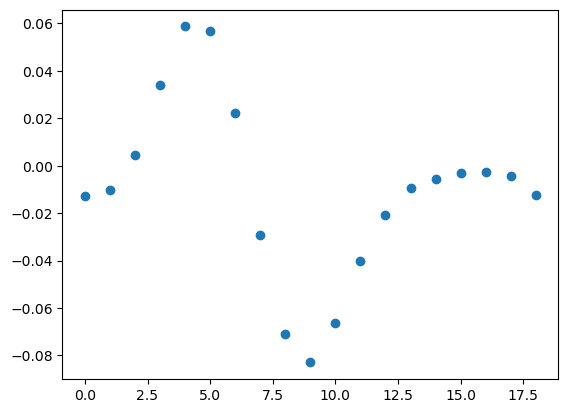

In [23]:
plt.plot(subject13.timepoint, subject13.signal, marker = 'o', linestyle='')

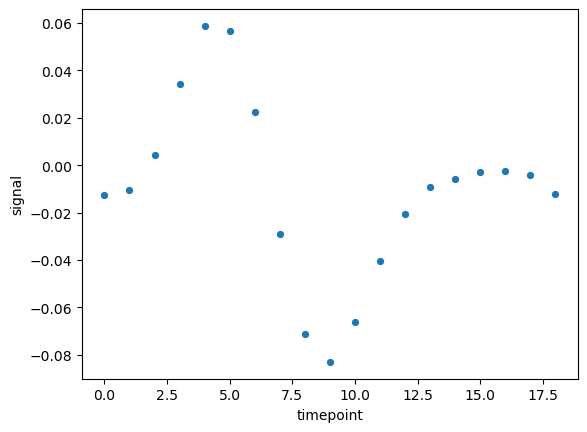

In [24]:
ax = sns.lineplot(x="timepoint", y="signal", data=subject13, linewidth=0, marker = 'o')

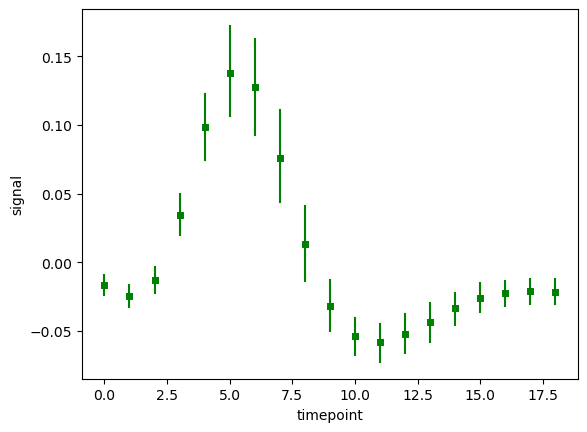

In [25]:
ax = sns.lineplot(x="timepoint", y="signal", color="green", 
                  data=df_fmri, linewidth=0, marker = 's', err_style="bars")

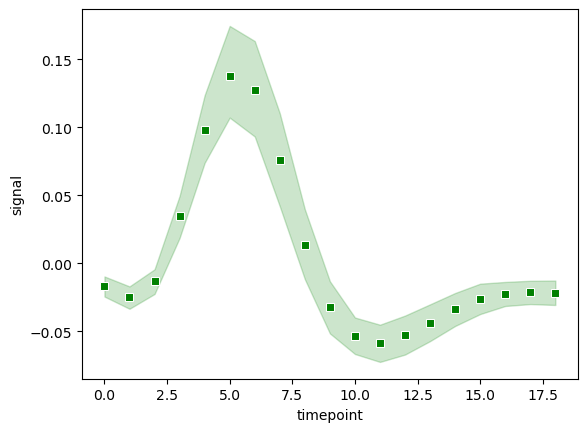

In [26]:
ax = sns.lineplot(x="timepoint", y="signal", color="green"
                  ,data=df_fmri, linewidth=0, marker = 's', err_style="band")

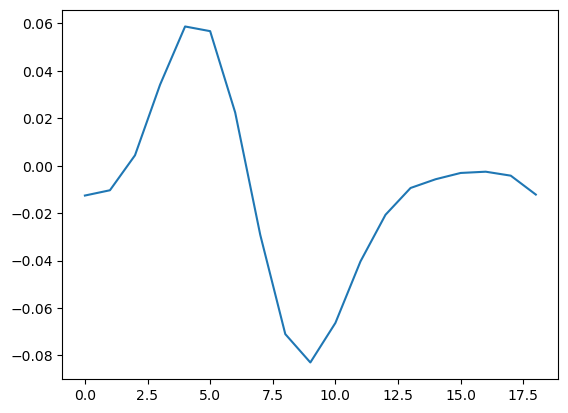

In [27]:
plt.plot(subject13.timepoint, subject13.signal)

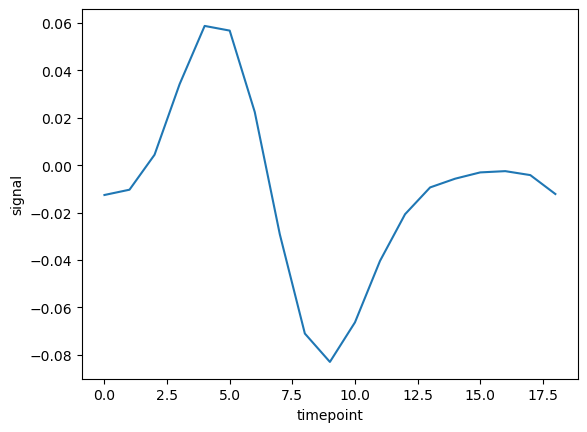

In [28]:
ax = sns.lineplot(x="timepoint", y="signal",data=subject13)

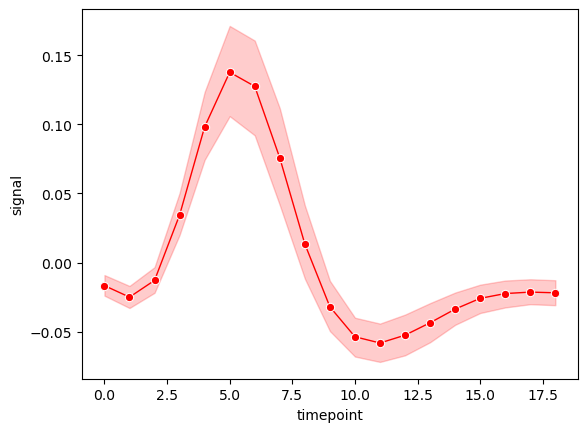

In [29]:
ax = sns.lineplot(x="timepoint", y="signal", color="red", 
                  data=df_fmri, linewidth=1, marker = 'o', err_style="band")